# **NYC TAXI DATA ANALISIS** 

In this notebook, we will analyze NYC taxi data previously processed with Spark. We will load results stored in CSV files from local folders (q1 to q5) and generate static plots with Matplotlib to visualize key patterns (common routes, trips by day, income, pickups by hour, and tip distribution). With these outputs we'll extract actionable insights to optimize taxi operations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
#base directory for CSV files
base_dir = "results"

#function to load the single CSV file from a query folder
def load_csv(query_folder):
    folder_path = os.path.join(base_dir, query_folder)
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv') and f != '_SUCCESS']
    if len(csv_files) != 1:
        raise ValueError(f"Expected exactly one CSV file in {folder_path}, found {len(csv_files)}")
    csv_path = os.path.join(folder_path, csv_files[0])
    return pd.read_csv(csv_path)

### Query 1: Most Common Routes


Most common routes (pickup to dropoff):
  pickup_quadrant dropoff_quadrant    count
0              NE               NE  2877644
1              SW               SW  2401525
2              NW               NE   915466
3              SW               NE   884741
4              NE               SW   776061
5              NE               NW   775022
6              NW               NW   730502
7              SW               NW   622817
8              NW               SW   597899
9              SW               SE   535123


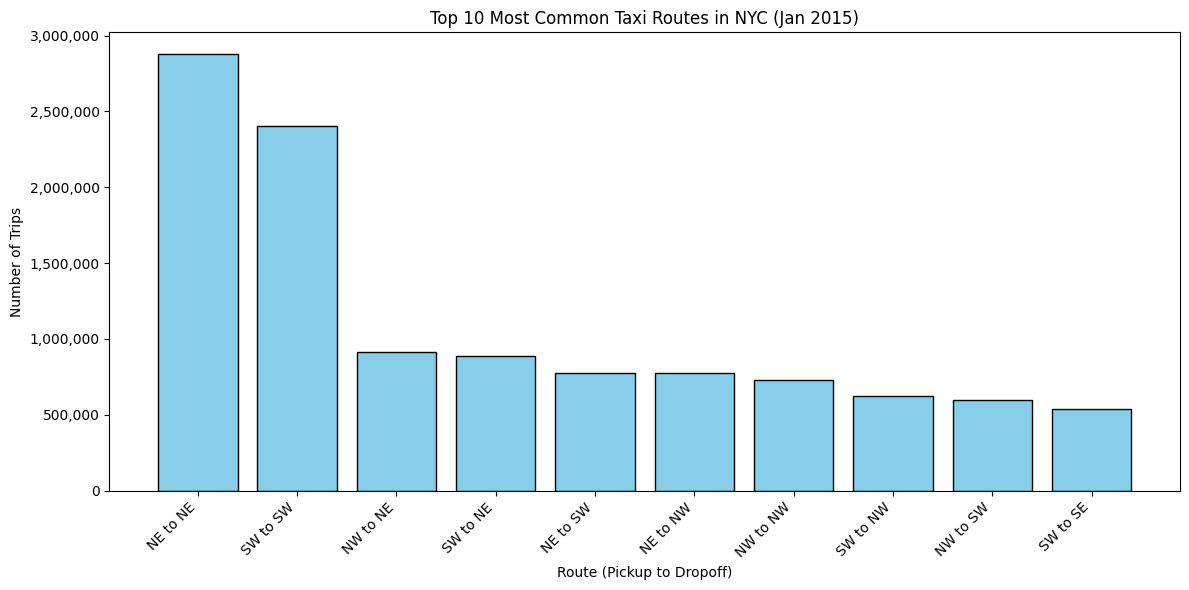

In [3]:
#Query 1: Most Common Routes (pickup_quadrant to dropoff_quadrant)
def query_1():
    #load CSV 
    result_pd = load_csv("q1")
    print("\nMost common routes (pickup to dropoff):")
    print(result_pd.head(10))
    
    #Create route column for plotting
    result_pd['route'] = result_pd['pickup_quadrant'] + ' to ' + result_pd['dropoff_quadrant']
    
    #Plot top 10 
    plt.figure(figsize=(12, 6))
    plt.bar(result_pd['route'][:10], result_pd['count'][:10], color='skyblue', edgecolor='black')
    plt.xlabel('Route (Pickup to Dropoff)')
    plt.ylabel('Number of Trips')
    plt.title('Top 10 Most Common Taxi Routes in NYC (Jan 2015)')
    plt.xticks(rotation=45, ha='right')
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.tight_layout()
    plt.show()
    
    return result_pd

# Run Query 1
result_q1 = query_1()

Conclusions for Query 1, based on the results and the plot:

Taxi Routes Patterns:
- Dominant Routes: The top two routes, "NE to NE" and "SW to SW" (with ,877,644 and 2,401,525 trips, accordingly), account for a significant portion of trips. These quadrants likely cover central Manhattan (for example, NE for Upper East Side/Midtown, SW for Lower Manhattan), where taxi demand is highest.
- Intra-Quadrant Travel: Most common routes are within the same quadrant (NE to NE, SW to SW, NW to NW, for example), suggesting many trips are short or localized within busy areas.
- Inter-Quadrant Travel: Routes like "NW to NE" and "SW to NE" indicate frequent travel between quadrants, possibly reflecting commutes to business districts.

Business Insight: 
- Taxi companies should prioritize driver availability in NE and SW quadrants, as they have the highest demand. Inter-quadrant routes, such as SW to NE suggest potential for targeted services, like airport shuttles from Lower Manhattan to Midtown.

### Query 2: Trips and Average Income by Day of Week


Number of trips and average income by day of week:
  day_of_week  trip_count  avg_income  income_q1  income_median  income_q3
0      Monday     1332871   15.036106       7.95          10.80      15.95
1     Tuesday     1373922   14.665750       8.30          11.15      15.95
2   Wednesday     1683987   14.907609       8.30          11.30      16.40
3    Thursday     2168213   15.284608       8.30          11.60      17.05
4      Friday     2227187   15.105905       8.30          11.30      16.80
5    Saturday     2379708   13.923240       7.80          10.80      15.80
6      Sunday     1583098   17.309871       7.80          10.80      16.30


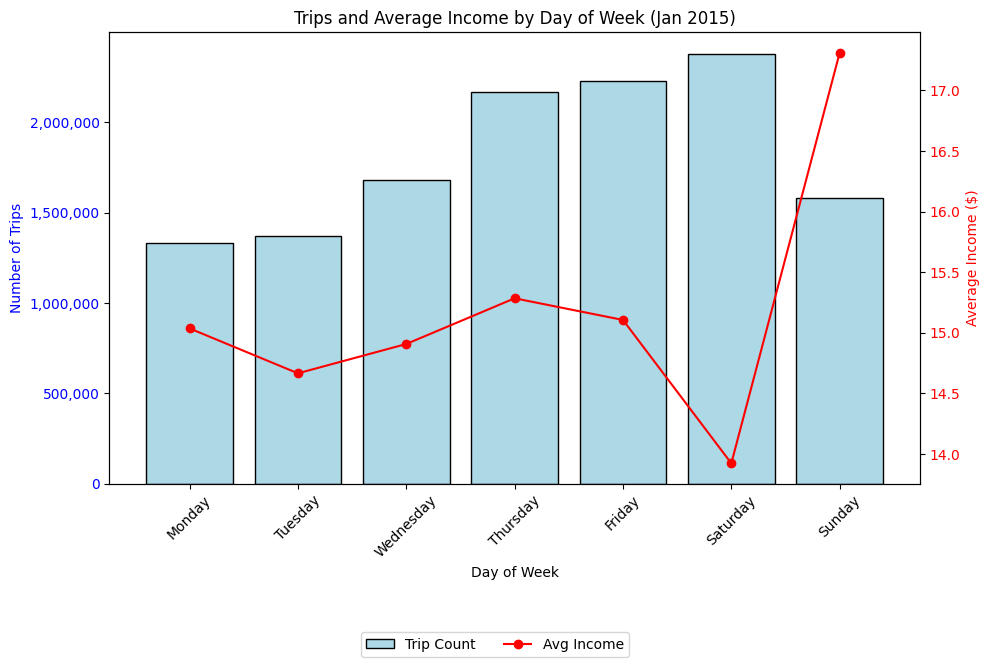

In [4]:
#Query 2: Trips and Average Income by Day of Week
def query_2():
    #load CSV from q2 folder
    result_pd = load_csv("q2")
    print("\nNumber of trips and average income by day of week:")
    print(result_pd)
    
    #Create plot
    fig, ax1 = plt.subplots(figsize=(10, 6))
    ax1.bar(result_pd['day_of_week'], result_pd['trip_count'], color='lightblue', edgecolor='black', label='Trip Count')
    ax1.set_xlabel('Day of Week')
    ax1.set_ylabel('Number of Trips', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(range(len(result_pd['day_of_week'])))
    ax1.set_xticklabels(result_pd['day_of_week'], rotation=45)
    ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    
    ax2 = ax1.twinx()
    ax2.plot(result_pd['day_of_week'], result_pd['avg_income'], color='red', marker='o', label='Avg Income')
    ax2.set_ylabel('Average Income ($)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')
    
    plt.title('Trips and Average Income by Day of Week (Jan 2015)')
    fig.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)
    plt.tight_layout()
    plt.show()
    
    return result_pd

# Run Query 2
result_q2 = query_2()

After looking into the resulting plot we can take the follwing conclusions, separated in the following categories:

Trip Patterns:
- Peak Days: Saturday and Friday have the highest trip counts, followed by Thursday. This suggests higher demand towards the end of the week, likely due to social activities, nightlife and weekend travel.
- Low Days: Monday and Tuesday have the fewest trips, indicating lower demand at the start of the week, possibly as people return to routine after the weekend.
- With this we can conclude a trend that perfectly reflects the typical weekly cycle in urban taxi usage.

Income Trends:
- Highest Income: Sunday has the highest average income per trip at $17.31, despite having fewer trips than weekdays. This suggests longer or more premium rides (like late-night rides) on Sundays.
- Lowest Income: Saturday has the lowest average income at $13.92, despite the highest trip count. This could indicate shorter or lower-fare trips.
- Weekday Income: Thursday ($15.28) and Friday ($15.11) have relatively high average incomes, likely due to a mix of business commutes and evening outings.
- Income Variability: The interquartile range (IQR) from income_q1 to income_q3 shows higher variability on Thursday and Friday, indicating a wider range of trip fares and possibly due to a mix of short commutes and longer premium rides.

Business Insight:
- Driver Scheduling: Increase driver availability on Friday and Saturday to meet high demand. However, they should ensure enough drivers on Sunday to capitalize on high-income opportunities.
- Pricing Strategy: Consider dynamic pricing on Sunday when average income is highest, as passengers may be willing to pay more for premium or longer rides. On Saturday, focus on maximizing trip volume rather than per-trip income.

### Query 3: Total Income by Dropoff Quadrant


Total income by dropoff quadrant:
  dropoff_quadrant  total_income
0               NE  7.089910e+07
1               SW  5.739830e+07
2               SE  3.176134e+07
3               NW  2.880485e+07
4          Invalid  3.751842e+06


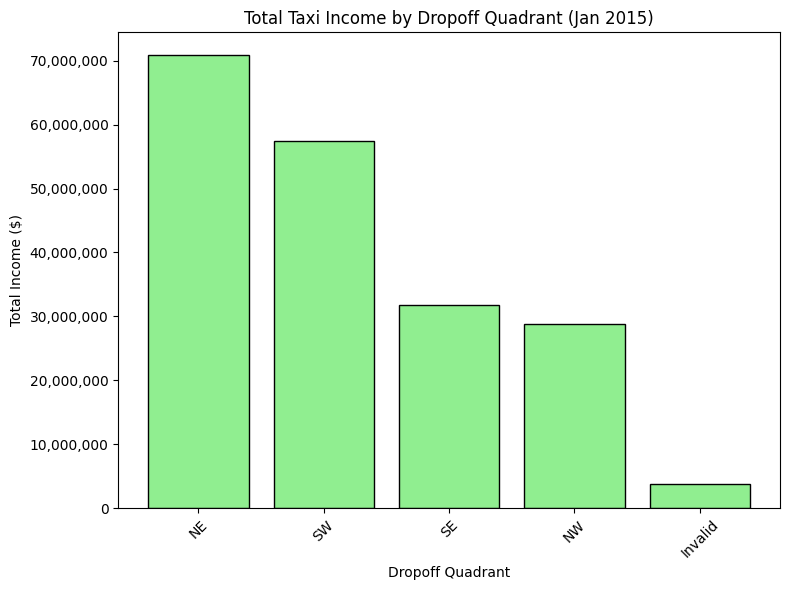

In [5]:
def query_3():
    #load CSV 
    result_pd = load_csv("q3")
    print("\nTotal income by dropoff quadrant:")
    print(result_pd)
    
    plt.figure(figsize=(8, 6))
    plt.bar(result_pd['dropoff_quadrant'], result_pd['total_income'], color='lightgreen', edgecolor='black')
    plt.xlabel('Dropoff Quadrant')
    plt.ylabel('Total Income ($)')
    plt.title('Total Taxi Income by Dropoff Quadrant (Jan 2015)')
    plt.xticks(rotation=45)
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.tight_layout()
    plt.show()
    
    return result_pd

result_q3 = query_3()

High-Income Areas:
- NE leads with the highest total income at $70,899,100, reflecting its dominance in trip volume, as seen in the first Query. This likely corresponds to central Manhattan areas like Midtown or Upper East Side, where fares are high due to business and tourist activity.
- SW follows with $57,398,300, consistent with its high trip count , representing Lower Manhattan with significant demand.
- SE and NW have lower totals at $31,761,340 and $28,804,850, respectively, indicating less revenue generation, possibly due to fewer trips or lower average fares in these quadrants.

Low-Income or Invalid Data:
- Invalid quadrant has a total income of $3,751,842, despite 214,144 trips, as known in Query 1. This suggests some revenue is recorded, but the low amount relative to trip count may indicate incomplete data or lower fares for invalid coordinates.

Business Insight:
- Driver Allocation: Prioritize driver presence in NE and SW quadrants to maximize revenue, as these areas generate the bulk of income.
- Marketing Focus: Target premium services like luxury rides in NE and SW, where high trip volumes and income suggest affluent passengers.

### Query 4: Pickups by Hour



Pickups by hour:
    pickup_hour  pickup_count  distance_p90  price_stddev
0            19        805230          4.94   4402.547920
1            18        799587          4.77     11.282455
2            20        733952          5.62     11.795060
3            21        711579          6.20     12.734176
4            22        686959          6.44     11.754412
5            17        668790          5.12     12.598013
6            14        658887          5.79     13.806650
7            15        648688          6.00     13.918949
8            12        637479          4.95     12.078734
9            13        635587          5.28     12.486769
10           11        596504          5.04     12.240433
11           23        592429          6.90     12.161763
12            9        580034          5.00     11.484275
13           16        576598          6.00     14.107029
14           10        567818          5.19     12.020840
15            8        561802          5.09     11.773

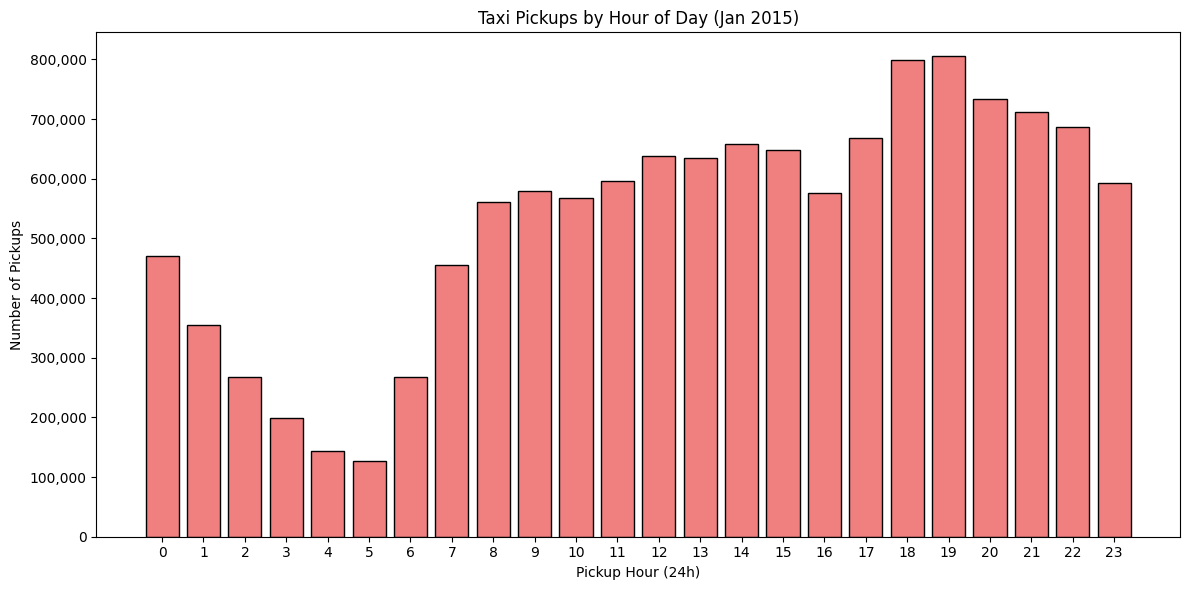

In [6]:
def query_4():
    #Load CSV from q4 folder
    result_pd = load_csv("q4")
    print("\nPickups by hour:")
    print(result_pd)
    
    #sort by hour for chronological display
    result_pd = result_pd.sort_values('pickup_hour')
    
    plt.figure(figsize=(12, 6))
    plt.bar(result_pd['pickup_hour'], result_pd['pickup_count'], color='lightcoral', edgecolor='black')
    plt.xlabel('Pickup Hour (24h)')
    plt.ylabel('Number of Pickups')
    plt.title('Taxi Pickups by Hour of Day (Jan 2015)')
    plt.xticks(range(0, 24))
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
    plt.tight_layout()
    plt.show()
    
    return result_pd

result_q4 = query_4()

After looking at this data we can conclude how:

Peak Hours:
- The highest pickups occur between 6 PM and 10 PM, being 19:00 the peakest hour with 805,230 pickups. This reflects evening rush hour and nightlife activity in NYC.
- Afternoon hours from 12 PM to 3 PM also show significant activity, with 14:00 having the greatest value at 658,887 pickups, likely due to midday commutes and business travel.

Low Hours:
- The fewest pickups are in the early morning, especially 5:00 AM (127,437) and 4:00 AM (143,271), indicating minimal activity during these hours.
- Hours from 1:00 AM to 6:00 AM always have low counts, aligning with reduced urban activity overnight.

Additional Insights from Extra Columns:
- Distance_p90 (90th Percentile Distance): Longer distances are observed in early morning hours (like 5:00 AM and 4:00 AM), suggesting airport or long-haul trips during off-peak times.
- Price_stddev (Standard Deviation of Price): Higher variability in prices occurs in early morning and late evening (19:00), indicating diverse fare structures, possibly due to surge pricing or long trips.

Business Insight:
- Driver Scheduling: Deploy more drivers from 6 PM to 10 PM and 12 PM to 3 PM to handle peak demand and reduce staff during 1:00 AM to 6:00 AM to minimize costs.
- Pricing Strategy: Implement surge pricing during 6 PM to 10 PM peak hours and offer competitive rates for long-distance early morning trips.

### Query 5: Tip Distribution by Dropoff Quadrant



Tip distribution by dropoff quadrant:
  dropoff_quadrant   avg_tip  tip_percentage    total_tips  trip_count  \
0               SE  5.409974        0.294743  6.845549e+06     1265357   
1          Invalid  1.599240        0.151316  3.763317e+05      235319   
2               SW  1.558805        0.159824  6.355594e+06     4077221   
3               NE  1.456453        0.127388  7.191425e+06     4937629   
4               NW  1.282917        0.152071  2.865344e+06     2233460   

   tip_skewness  tip_variance  
0   1124.877932  1.233419e+07  
1     44.224545  1.248324e+01  
2     52.023524  5.428030e+00  
3     14.746882  4.711823e+00  
4     12.291722  3.920973e+00  


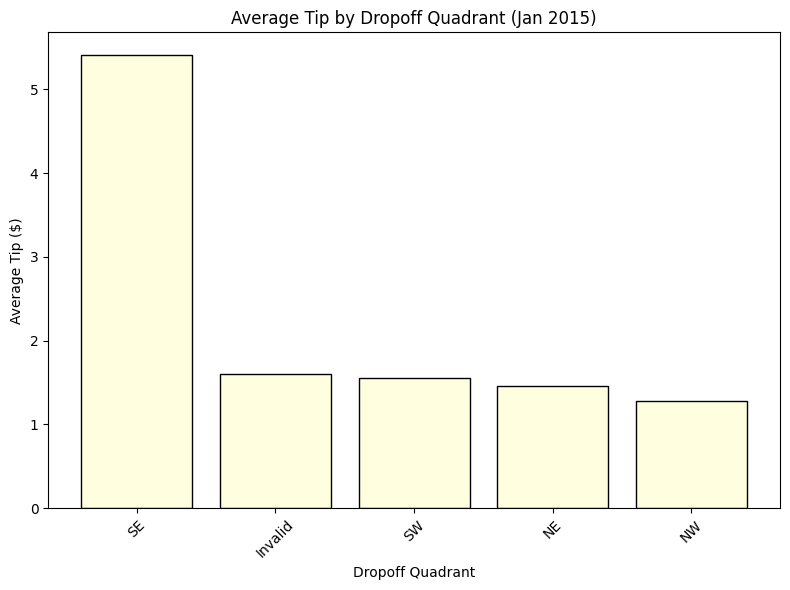

In [8]:
def query_5():
    result_pd = load_csv("q5")
    print("\nTip distribution by dropoff quadrant:")
    print(result_pd)
    
    plt.figure(figsize=(8, 6))
    plt.bar(result_pd['dropoff_quadrant'], result_pd['avg_tip'], color='lightyellow', edgecolor='black')
    plt.xlabel('Dropoff Quadrant')
    plt.ylabel('Average Tip ($)')
    plt.title('Average Tip by Dropoff Quadrant (Jan 2015)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    return result_pd

result_q5 = query_5()

We can conclude:

Tipping Patterns:
- SE stands out with the highest average tip at $5.41, despite having a moderate trip count (1,265,357). The high tip percentage (29.47%) and total tips ($6,845,549) suggest generous tipping, possibly due to longer trips or wealthier passengers in this quadrant (parts of Lower East Side or tourist areas).
- NE has a moderate average tip of $1.46 but the highest total tips ($7,191,425) due to the largest trip count (4,937,629), aligning with its high income from Query 3 ($70,899,100).  The tip percentage (12.74%) is lower, indicating smaller tips relative to fare.
- SW follows with an average tip of $1.56 and total tips of $6,355,594, supported by a high trip count (4,077,221) and consistent with its Query 3 income ($57,398,300). The tip percentage (15.98%) is higher than NE, suggesting better tipping behavior.
- NW has the lowest average tip ($1.28) and total tips ($2,865,344), with a trip count of 2,233,460, reflecting lower revenue potential ($28,804,850, estimated in Query 3).
- Invalid quadrant shows a low average tip ($1.60) and total tips ($376,331) despite 235,319 trips, with a tip percentage (15.13%). The low tip amount may indicate data issues or shorter/lower-fare trips.

Additional Insights from Extra Columns:
- Tip Skewness: SE has an extreme skewness (1,124.88), suggesting a few very high tips skew the average, possibly from outliers (like large groups or exceptional service). On the other hand, NE (14.75), SW (52.02), NW (12.29), and Invalid (44.22) have more moderate skewness, indicating less extreme outliers.
- Tip Variance: SE has the highest variance (12,334,190), reinforcing the presence of outlier tips. NE (4,711.82), SW (5,428.03), NW (3,920.97), and Invalid (12.48) have lower variances, suggesting more consistent tipping behavior.

Business Insight:
- Driver Focus: Encourage drivers to prioritize SE dropoffs for higher per-trip tips, despite fewer trips. Enhance service quality in NE and SW to boost their already high total tip revenue.
- Incentive Programs: Offer incentives for drivers in SE to capitalize on high-tip potential, and investigate outlier tips to replicate success.